In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

In [5]:
data = pd.read_csv("IRIS.csv")
df = pd.DataFrame(data)

In [7]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


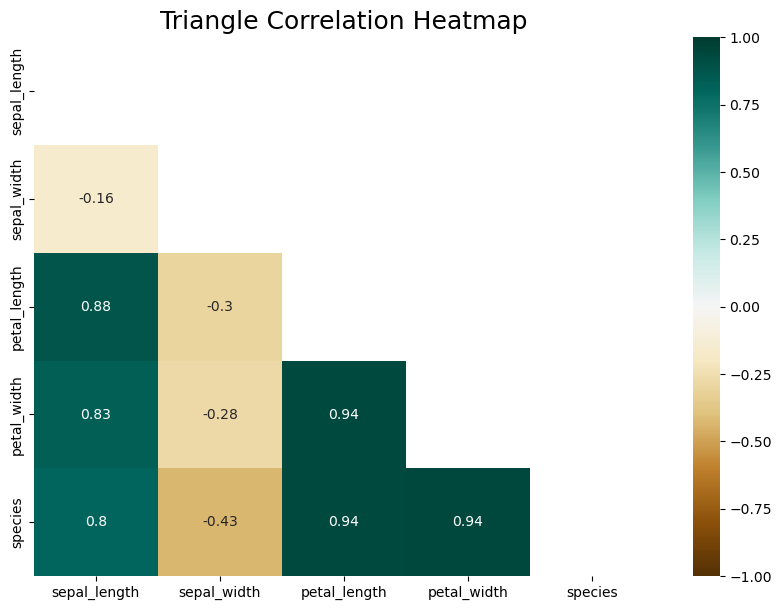

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 7))

mask = np.triu(np.ones_like(df.corr(method="spearman"), dtype=bool))
heatmap = sns.heatmap(df.corr(method="spearman"), mask=mask, vmin=-1, vmax=1,
                      annot=True, cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 18})  # Corrected line

plt.show()


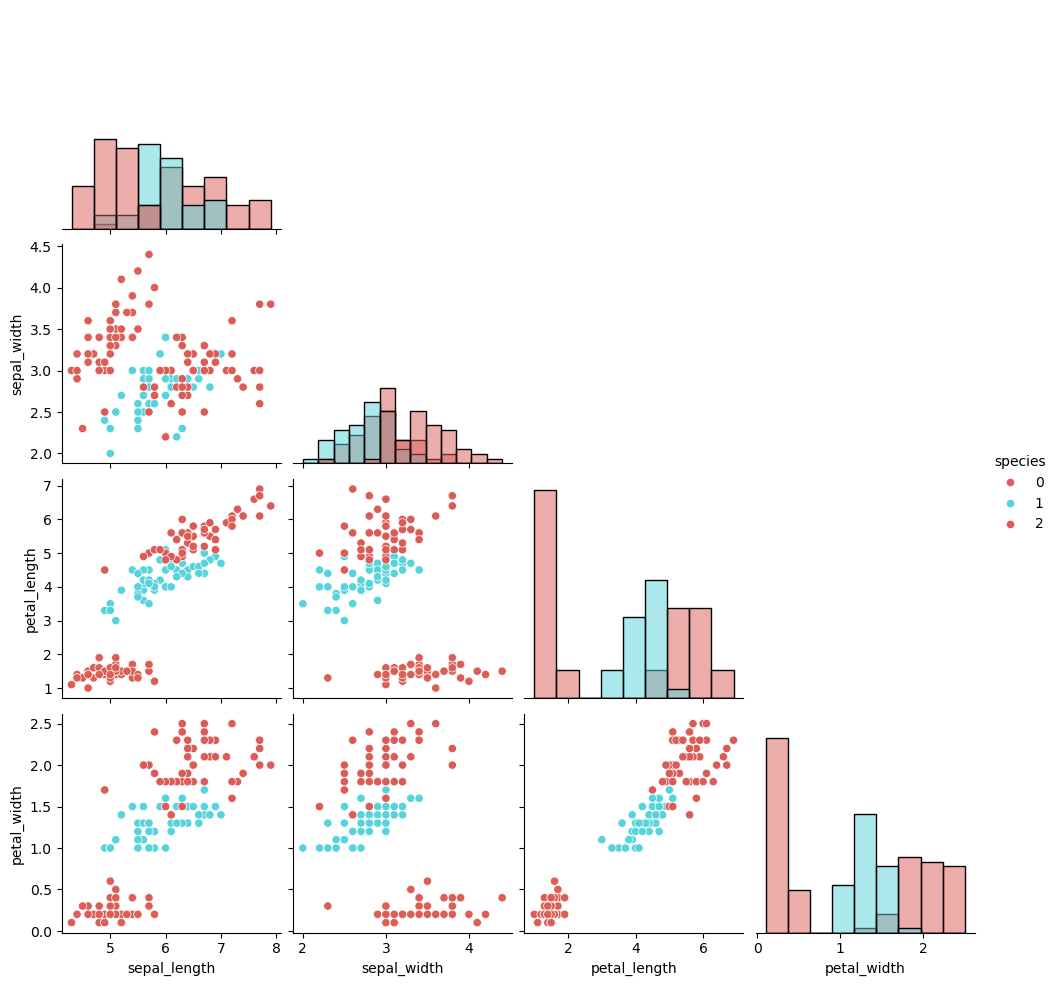

In [33]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')

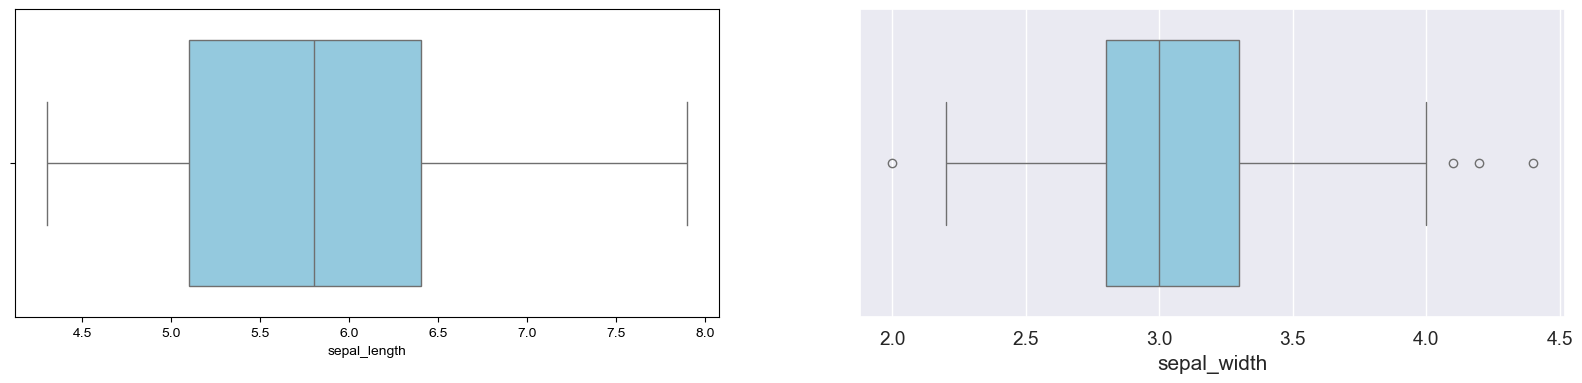

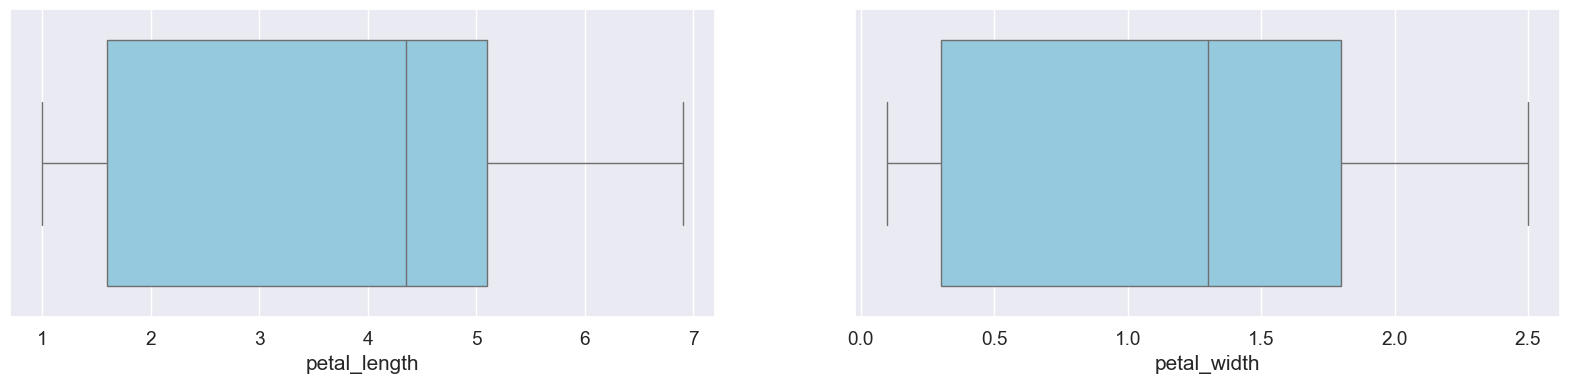

In [35]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()


<Axes: xlabel='species', ylabel='count'>

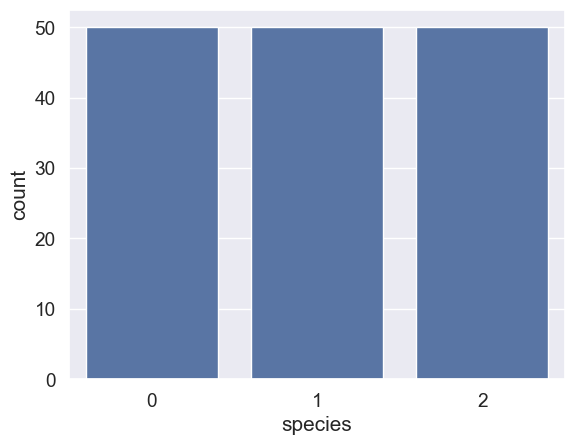

In [37]:
sns.countplot(x = df['species'] , data = df)

In [43]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = df["species"].values.reshape(-1,1)


In [41]:

Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(df)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5 , random_state = 0)

In [47]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [51]:
LogReg = LogisticRegression(solver = "liblinear" , C=40)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 97.32
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.4
 • Recall Score is : 93.33
 • F1-Score Score is : 93.34


In [53]:
kfold = KFold(37)
LR_r = cross_val_score (LogReg, X, y, cv = kfold)
print(np.std(LR_r))

0.10335850365390781


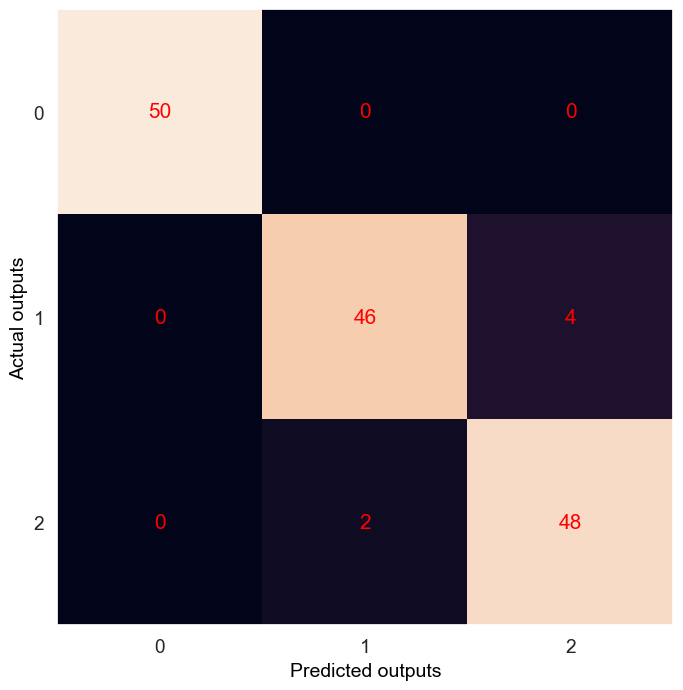

In [55]:
cm = confusion_matrix (y , LogReg.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

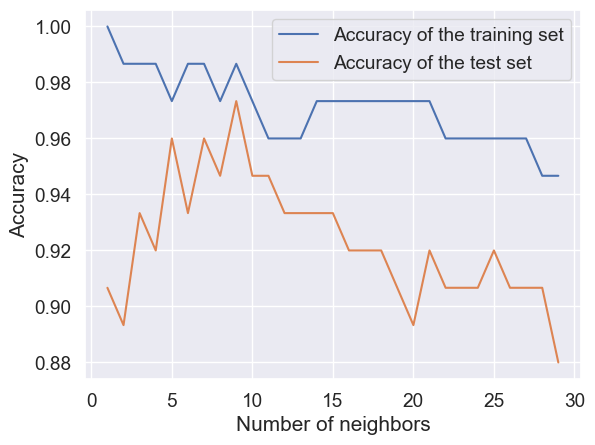

In [57]:
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))
                    
plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

In [59]:
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 3}

In [61]:
K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train , y_train.ravel())
y_pred_KNN = KNN.predict(X_test)
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train, X_test, y_train, y_test)

K-Nearest Neighbors : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 97.14
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.63
 • Recall Score is : 93.33
 • F1-Score Score is : 93.27


In [63]:
NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes : 

 • Training Accuracy Score :  97.33
 • Cross Validation Score : 97.14
 • Testing Accuracy Score :94.67
 • Precision Score is : 95.29
 • Recall Score is : 94.67
 • F1-Score Score is : 94.59


In [ ]:
NB_r = cross_val_score (NB, X, y, cv = 10)
N = np.std(NB_r)
print(N)

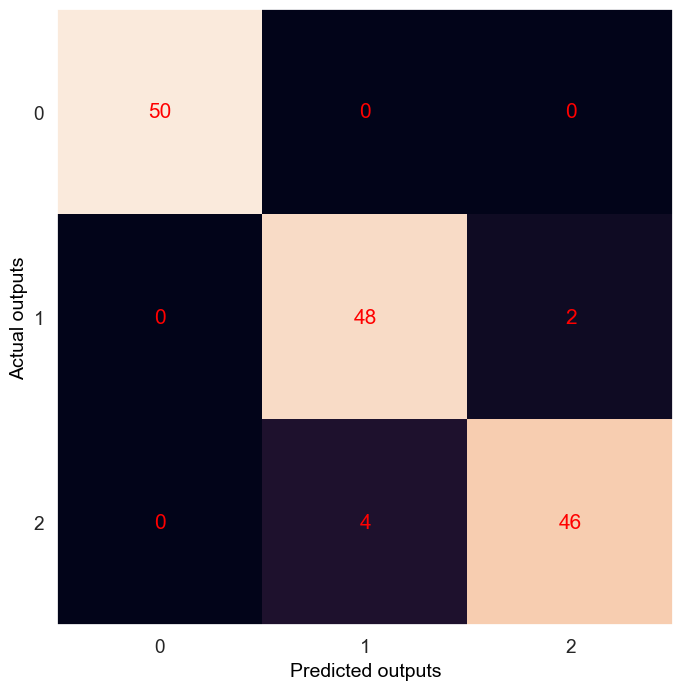

In [69]:
cm = confusion_matrix (y , NB.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()


In [72]:
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  96.0
 • Cross Validation Score : 95.71
 • Testing Accuracy Score :94.67
 • Precision Score is : 94.8
 • Recall Score is : 94.67
 • F1-Score Score is : 94.64


In [ ]:
SVM_r = cross_val_score (SVM, X, y, cv = 10)
S = np.std(SVM_r)
print(S)

In [ ]:
cm = confusion_matrix (y , SVM.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

In [74]:
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

Decision Tree : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 94.46
 • Testing Accuracy Score :96.0
 • Precision Score is : 96.03
 • Recall Score is : 96.0
 • F1-Score Score is : 95.99


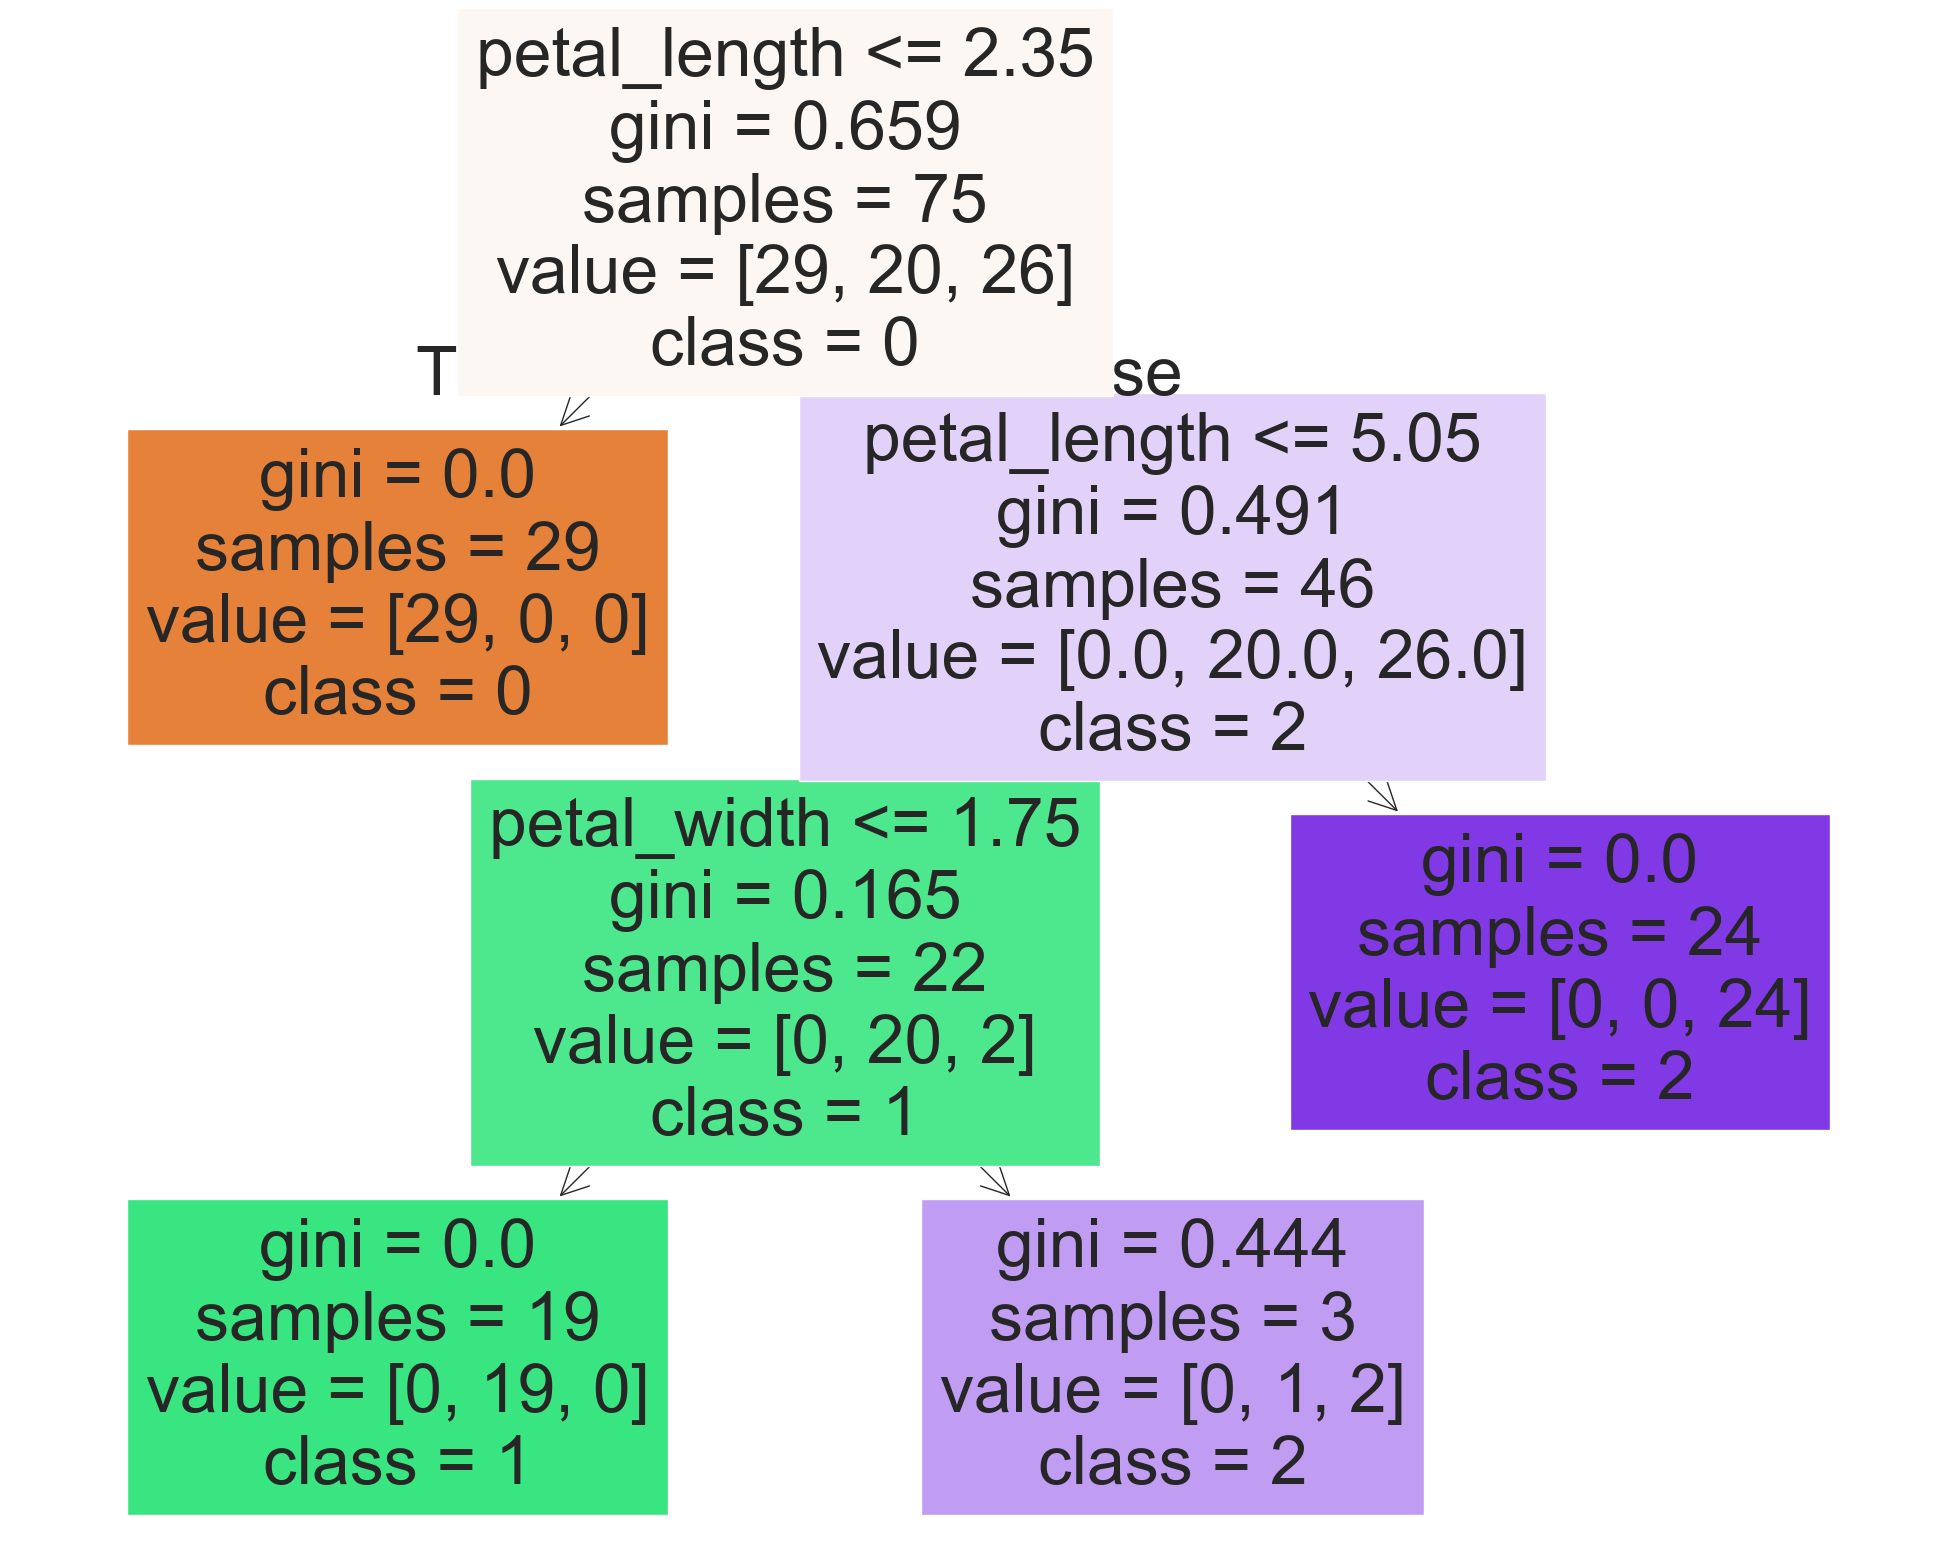

In [76]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , filled = True)

In [80]:
RF = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF = RF.fit(X_train , y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest : ")
Evaluate_Performance(RF, X_train, X_test, y_train, y_test)

Random Forest : 

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 95.71
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.63
 • Recall Score is : 93.33
 • F1-Score Score is : 93.27


In [82]:
RF_r = cross_val_score (RF, X, y, cv = 10)
R = np.std(RF_r)
print(R)

0.059999999999999984


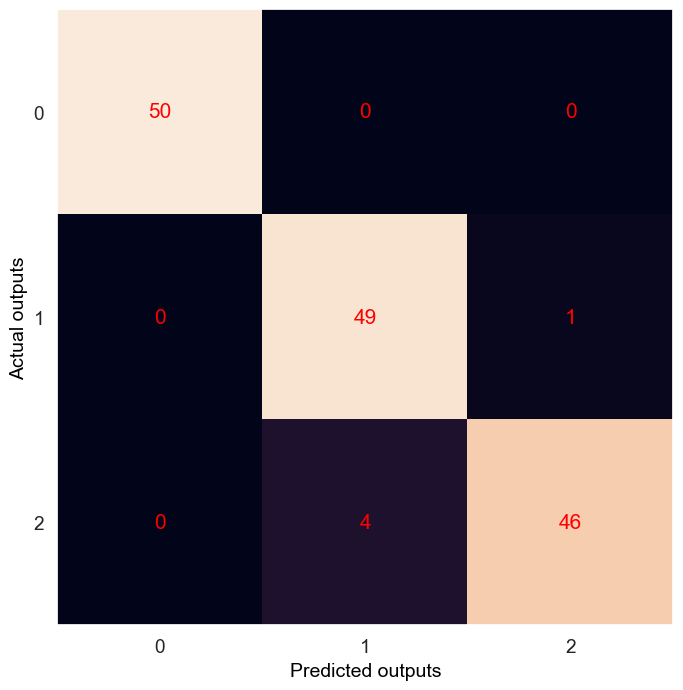

In [84]:
cm = confusion_matrix (y , RF.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

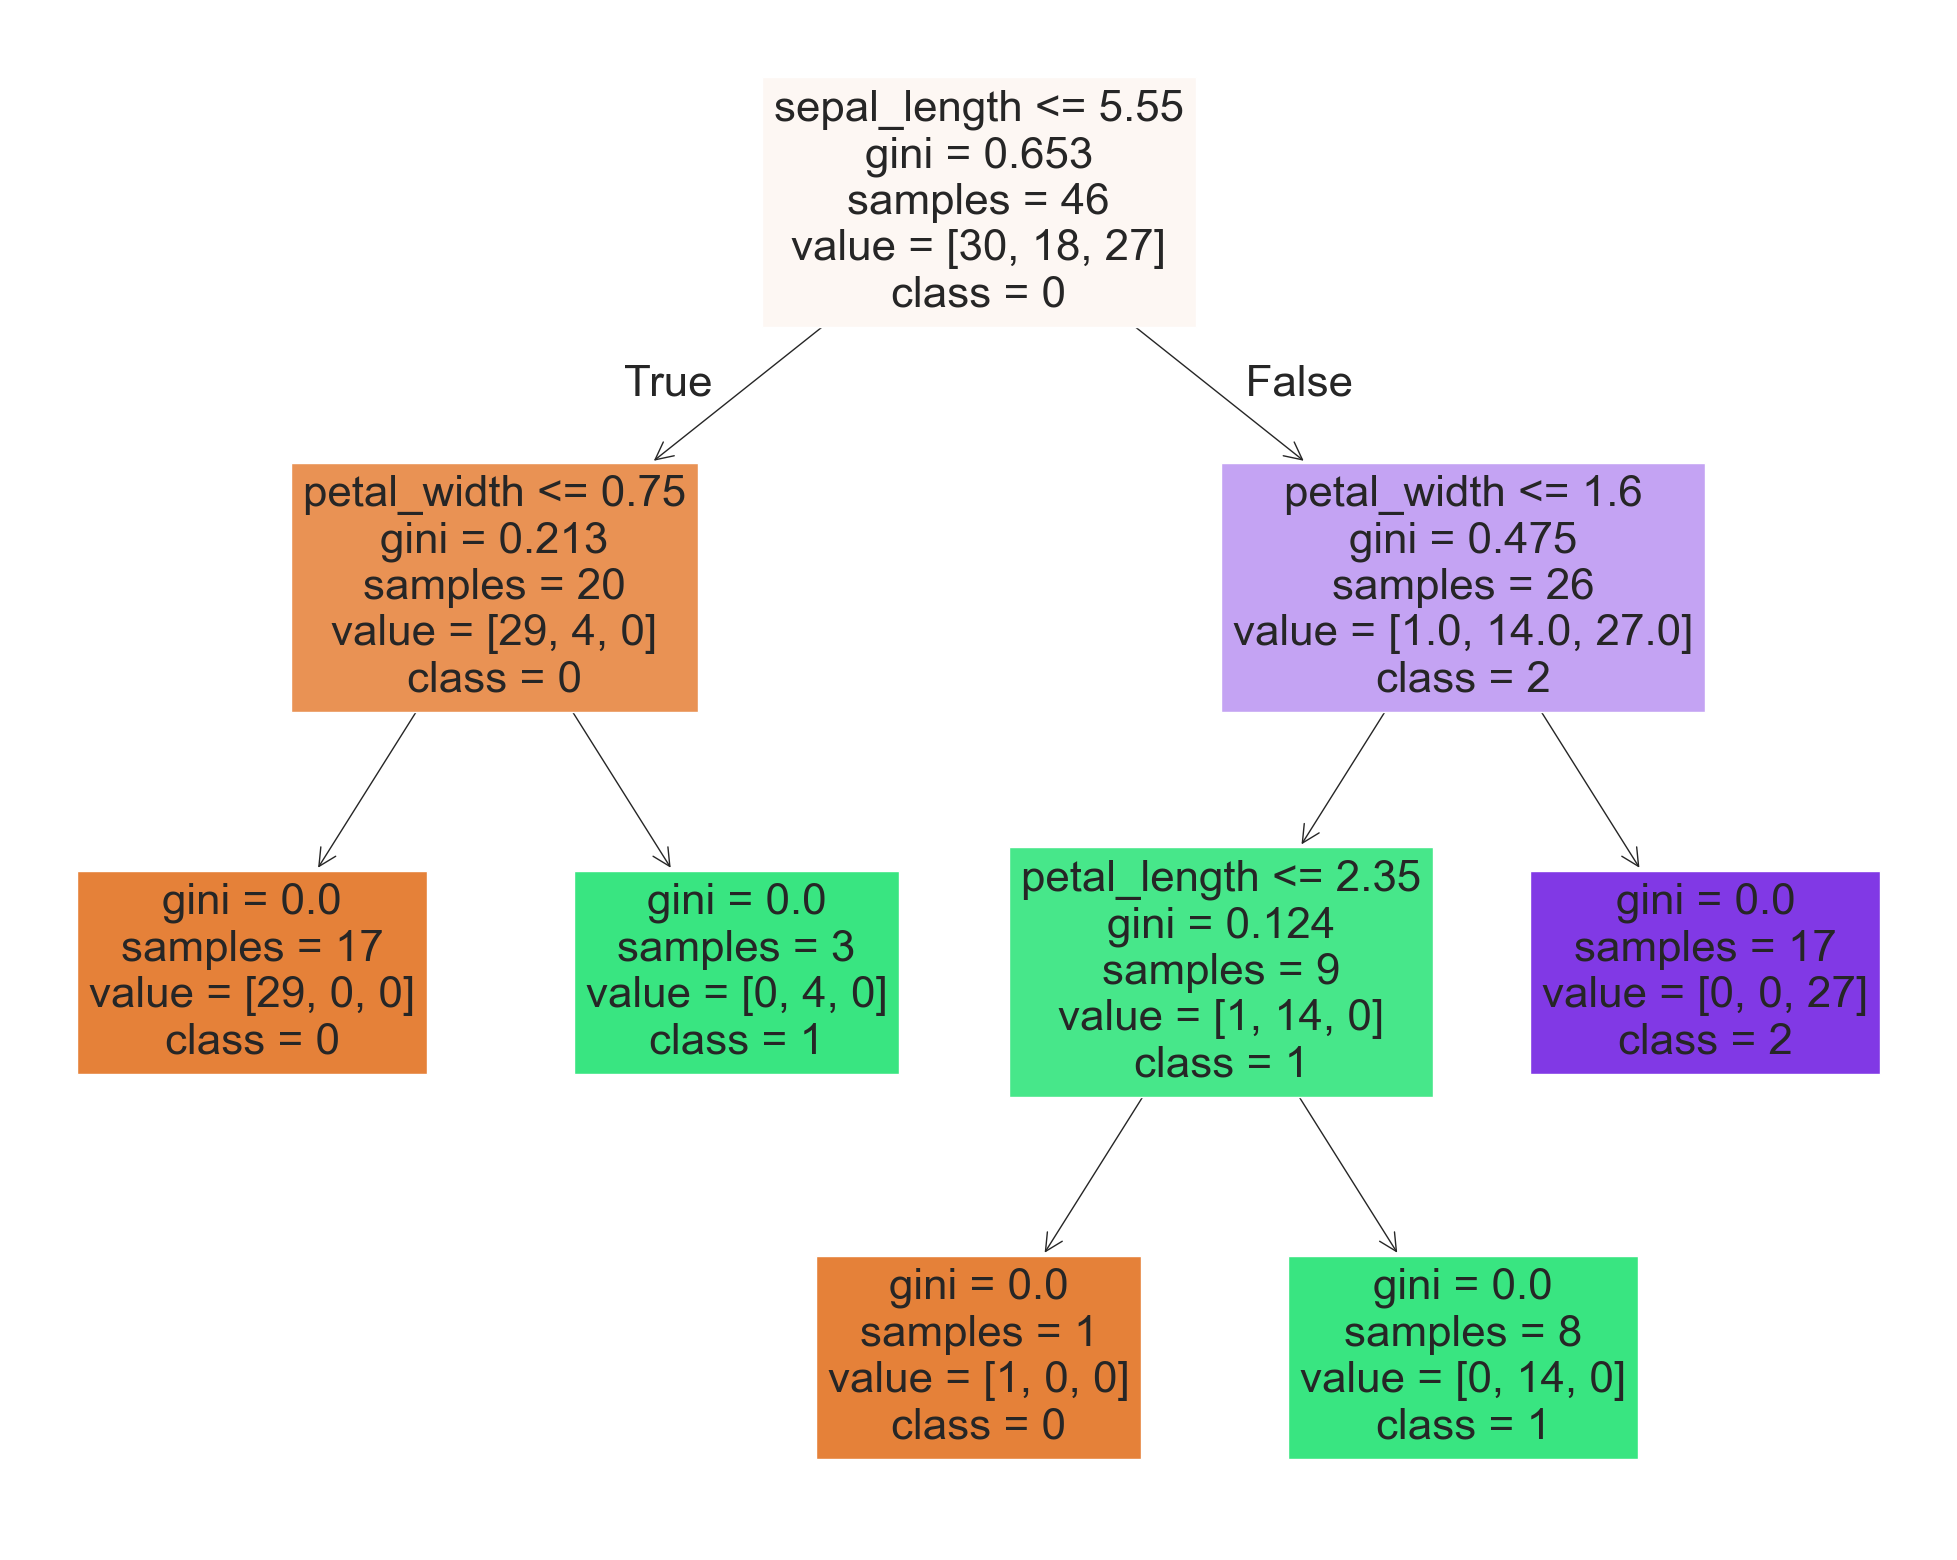

In [86]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree (RF.estimators_[5] , feature_names = F , class_names = T , filled = True)

In [88]:
models = pd.DataFrame ({'Model' : ['Logestic Regression' , ' KNN' , 'Naive Bayes' , 'SVM' , 'Decision Tree' , 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_LR, average='weighted') , precision_score(y_test, y_pred_KNN, average='weighted') , precision_score(y_test, y_pred_NB, average='weighted') , precision_score(y_test, y_pred_SVM, average='weighted') , precision_score(y_test, y_pred_DT, average='weighted') , precision_score(y_test, y_pred_RF, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_LR, average='weighted') , recall_score(y_test, y_pred_KNN, average='weighted') , recall_score(y_test, y_pred_NB, average='weighted') , recall_score(y_test, y_pred_SVM, average='weighted') , recall_score(y_test, y_pred_DT, average='weighted') , recall_score(y_test, y_pred_RF, average='weighted')] ,
                        'F1-score' : [f1_score(y_test, y_pred_LR, average='weighted') , f1_score(y_test, y_pred_KNN, average='weighted') , f1_score(y_test, y_pred_NB, average='weighted') , f1_score(y_test, y_pred_SVM, average='weighted') , f1_score(y_test, y_pred_DT, average='weighted') , f1_score(y_test, y_pred_RF, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_LR) , accuracy_score(y_test, y_pred_KNN) , accuracy_score(y_test, y_pred_NB) , accuracy_score(y_test, y_pred_SVM) , accuracy_score(y_test, y_pred_DT) , accuracy_score(y_test, y_pred_RF)], 
                        'Err' : [np.std(LR_r) , np.std(KNN_r) , np.std(NB_r) , np.std(SVM_r) , np.std(DT_r) , np.std(RF_r)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

NameError: name 'KNN_r' is not defined